<a href="https://colab.research.google.com/github/kouichi310/example_PCA/blob/main/PCA%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリを使用したPCA

[[115.18231034  42.8417931 ]
 [ 42.8417931   94.40064368]]


,PC1,PC2
身長 (cm),0.786036,-0.618180
体重 (kg),0.618180,0.786036


,PC1,PC2
固有値,148.875359,60.707595


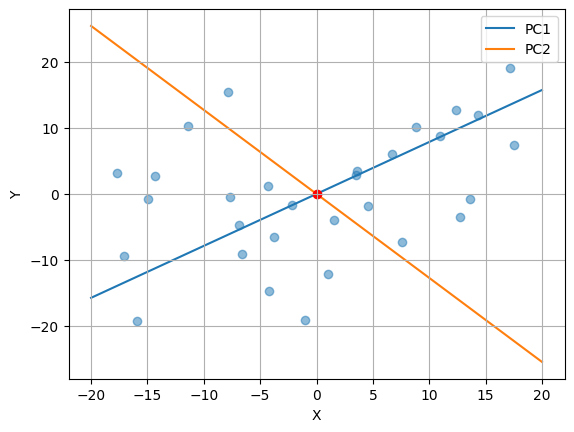

In [ ]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import sklearn    #機械学習のライブラリ
from sklearn.decomposition import PCA   #主成分分析器
from sklearn.preprocessing import StandardScaler
from IPython.display import display

dataset = pd.read_csv('book_sample_data.csv')
# データの平均値を計算
mean_values = dataset.mean()

# データから平均値を引いて中心化する
centered_data = dataset - mean_values

# プロット
plt.figure()

# データ点をプロット
plt.scatter(centered_data.iloc[:, 0], centered_data.iloc[:, 1], alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')

# 原点（平均値）をプロット
plt.scatter(0, 0, color='red', marker='o')

#主成分分析の実行
pca = PCA()
pca.fit(dataset)

print(pca.get_covariance()) # 分散共分散行列

eig_vec = pd.DataFrame(pca.components_.T, index = dataset.columns, \
                          columns = ["PC{}".format(x + 1) for x in range(len(dataset.columns))])
display(eig_vec)
x = np.linspace(start=-20, stop=20, num=101)
y = (eig_vec.iloc[1,0] / eig_vec.iloc[0,0]) * x
plt.plot(x, y, label='PC1', zorder=0)
x = np.linspace(start=-20, stop=20, num=101)
y = (eig_vec.iloc[1,1] / eig_vec.iloc[0,1]) * x
plt.plot(x, y, label='PC2', zorder=0)

# 固有値
eig = pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dataset.columns))], columns=['固有値']).T
display(eig)

plt.legend()
plt.grid()

# グラフを表示
plt.show()


# 最小限ライブラリver

固有ベクトル:
        PC1       PC2
0  0.786036 -0.618180
1  0.618180  0.786036
固有値:
            固有値
PC1  148.875359
PC2   60.707595


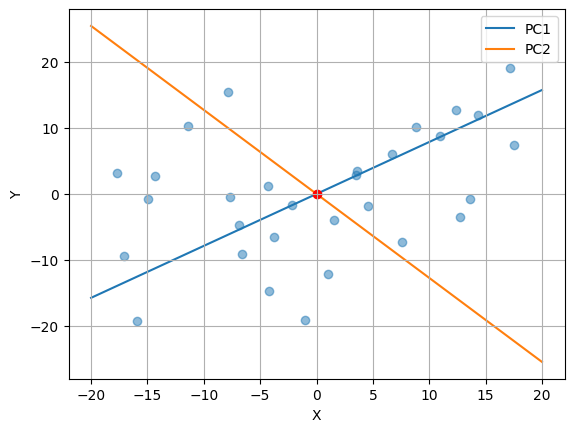

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み
dataset = pd.read_csv('book_sample_data.csv')

# データの平均値を計算
mean_values = dataset.mean()

# データから平均値を引いて中心化する
centered_data = dataset - mean_values

# プロット
plt.figure()

# データ点をプロット
plt.scatter(centered_data.iloc[:, 0], centered_data.iloc[:, 1], alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')

# 原点（平均値）をプロット
plt.scatter(0, 0, color='red', marker='o')

# 共分散行列の計算
cov_matrix = np.cov(centered_data.T)

# 共分散行列から固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 固有ベクトルを表示
eig_vec = pd.DataFrame(eigenvectors, columns=["PC1", "PC2"])
print("固有ベクトル:")
print(eig_vec)

# 固有値を表示
eig = pd.DataFrame(eigenvalues, index=["PC1", "PC2"], columns=["固有値"])
print("固有値:")
print(eig)

# 主成分をプロット
x = np.linspace(start=-20, stop=20, num=101)
y1 = eig_vec.iloc[1, 0] / eig_vec.iloc[0, 0] * x
y2 = eig_vec.iloc[1, 1] / eig_vec.iloc[0, 1] * x

plt.plot(x, y1, label='PC1', zorder=0)
plt.plot(x, y2, label='PC2', zorder=0)

plt.legend()
plt.grid()

# グラフを表示
plt.show()
